In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import kstest
from scipy.stats import ks_2samp
import statsmodels.api as sm
import seaborn as sn
import plotly.express as px

In [2]:
supply = pd.read_csv (r'C:\Users\Windows 10\Desktop\Hamoye\Stage D\Africa Food Supply (2004 - 2013).csv',encoding='latin-1')
supply.head()

,Country,Year,Value
0,Algeria,2004,2987
1,Algeria,2005,2958
2,Algeria,2006,3047
3,Algeria,2007,3041
4,Algeria,2008,3048


In [3]:
supply.describe()

,Year,Value
count,450.000000,450.000000
mean,2008.500000,2469.775556
std,2.875478,379.140143
min,2004.000000,1781.000000
25%,2006.000000,2174.000000
50%,2008.500000,2376.000000
75%,2011.000000,2681.750000
max,2013.000000,3561.000000


In [4]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  450 non-null    object
 1   Year     450 non-null    int64 
 2   Value    450 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 10.7+ KB


In [5]:
groupedsupply=supply.groupby([ 'Country' , 'Year']) ['Value'].sum( ) 
print (groupedsupply)

Country   Year
Algeria   2004    2987
          2005    2958
          2006    3047
          2007    3041
          2008    3048
                  ... 
Zimbabwe  2009    2147
          2010    2168
          2011    2200
          2012    2197
          2013    2110
Name: Value, Length: 450, dtype: int64


In [6]:
print(supply.isnull().sum())

Country    0
Year       0
Value      0
dtype: int64


In [7]:
# Total Number Of Times A country occured In the Country Column
valueCount=supply['Country'].value_counts()
print(valueCount)

Algeria                        10
Malawi                         10
Mauritania                     10
Mauritius                      10
Morocco                        10
Mozambique                     10
Namibia                        10
Niger                          10
Nigeria                        10
Rwanda                         10
Sao Tome and Principe          10
Senegal                        10
Sierra Leone                   10
South Africa                   10
Sudan                          10
Swaziland                      10
Togo                           10
Tunisia                        10
Uganda                         10
United Republic of Tanzania    10
Zambia                         10
Mali                           10
Madagascar                     10
Angola                         10
Liberia                        10
Benin                          10
Botswana                       10
Burkina Faso                   10
Cabo Verde                     10
Cameroon      

In [8]:
NumberOfCountry=supply['Country'].nunique()
print(NumberOfCountry)

45


In [9]:
NumberofRows=len(supply.index)
print(NumberofRows)

450


In [10]:
# Group by and aggregate
dataGroup = supply.groupby(['Year', 'Country']).agg(Value_max=('Value', 'max')).reset_index()

# Sort column(s) Value_max descending (Z-A)
dataSort = dataGroup.sort_values(by=['Value_max'], ascending=[False])

# Group by and aggregate
CountrieswithMostSupplyList = dataSort.groupby(['Country']).agg(Value_max_max=('Value_max','max')).reset_index()

# Sort column(s) Value_max_max descending (Z-A)
CountrieswithMostSupplyList = CountrieswithMostSupplyList.sort_values(by=['Value_max_max'], ascending=[False])

print(CountrieswithMostSupplyList)

                        Country  Value_max_max
12                        Egypt           3561
27                      Morocco           3403
40                      Tunisia           3390
0                       Algeria           3296
26                    Mauritius           3151
16                        Ghana           3077
36                 South Africa           3022
24                         Mali           2890
25                   Mauritania           2876
14                        Gabon           2830
10                Cote d'Ivoire           2799
31                      Nigeria           2725
4                  Burkina Faso           2720
15                       Gambia           2692
6                      Cameroon           2671
2                         Benin           2619
5                    Cabo Verde           2609
11                     Djibouti           2607
20                      Lesotho           2595
30                        Niger           2567
17           

In [11]:
fig1 = px.histogram(CountrieswithMostSupplyList, x='Country', y='Value_max_max', title='Countries That Supplied The Most Items From The Highest To The Lowest')
fig1

In [12]:
fig2 = px.box(supply, x='Year', y='Value', title='Food Consumption in 45 African countries between 2004 and 2013')
fig2

In [13]:
def plot_boxplot(dataframe, columns):
    supply.boxplot(column=[columns])
    plt.grid(False)
    plt.show()

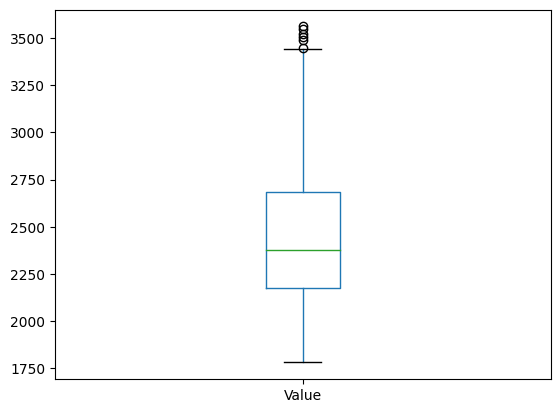

In [14]:
fig3=plot_boxplot(supply, 'Value')
fig3

In [15]:
# Keep rows where Year == 2012
supply2012 = supply.loc[supply['Year'] == 2012]
print(supply2012)

                         Country  Year  Value
8                        Algeria  2012   3272
18                        Angola  2012   2384
28                         Benin  2012   2610
38                      Botswana  2012   2342
48                  Burkina Faso  2012   2707
58                    Cabo Verde  2012   2590
68                      Cameroon  2012   2622
78      Central African Republic  2012   2116
88                          Chad  2012   2124
98                         Congo  2012   2158
108                Cote d'Ivoire  2012   2780
118                     Djibouti  2012   2545
128                        Egypt  2012   3561
138                     Ethiopia  2012   2124
148                        Gabon  2012   2795
158                       Gambia  2012   2652
168                        Ghana  2012   3043
178                       Guinea  2012   2561
188                Guinea-Bissau  2012   2331
198                        Kenya  2012   2192
208                      Lesotho  

In [16]:
def fetch_outliers(supply):
    Q1 = supply.quantile(0.25)
    Q3 = supply.quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers = supply[((supply<(Q1-1.5*IQR)) | (supply>(Q3+1.5*IQR)))]

    return outliers


In [17]:
outliers = fetch_outliers(supply['Value'])

print ("Max Outlier Value : "+ str(outliers.max()))
print ("Number Of Outliers : "+ str(len(outliers)))
print(outliers)

Max Outlier Value : 3561
Number Of Outliers : 6
123    3445
124    3490
126    3507
127    3549
128    3561
129    3522
Name: Value, dtype: int64


In [18]:
# Filter the rows of the dataset with value 3561 to know which country and year had the Most outlier

outlierInfo = supply.loc[supply['Value'] == 3561]
print(outlierInfo)

    Country  Year  Value
128   Egypt  2012   3561


In [19]:
# Sort the data starting with rows with the biggest values
supplyBiggerValues = supply.sort_values(by=['Value'], ascending=[False])
print(supplyBiggerValues)

    Country  Year  Value
128   Egypt  2012   3561
127   Egypt  2011   3549
129   Egypt  2013   3522
126   Egypt  2010   3507
124   Egypt  2008   3490
..      ...   ...    ...
431  Zambia  2005   1873
430  Zambia  2004   1866
432  Zambia  2006   1838
434  Zambia  2008   1801
433  Zambia  2007   1781

[450 rows x 3 columns]


In [20]:
# Visualisation of data to show countries with most food supply between 2004 to 2013
fig4 = px.box(supplyBiggerValues, x='Country', y='Value')
fig4

In [21]:
supplyMed = supply['Value'].median()
print(supplyMed)

2376.0


In [22]:
qgroup=supply.groupby('Country').quantile(0.25)
print(qgroup)

                                Year    Value
Country                                      
Algeria                      2006.25  3042.50
Angola                       2006.25  2132.50
Benin                        2006.25  2476.00
Botswana                     2006.25  2185.75
Burkina Faso                 2006.25  2549.25
Cabo Verde                   2006.25  2523.25
Cameroon                     2006.25  2360.00
Central African Republic     2006.25  2026.75
Chad                         2006.25  2026.25
Congo                        2006.25  2136.75
Cote d'Ivoire                2006.25  2738.25
Djibouti                     2006.25  2339.00
Egypt                        2006.25  3402.00
Ethiopia                     2006.25  1969.75
Gabon                        2006.25  2702.00
Gambia                       2006.25  2482.50
Ghana                        2006.25  2808.25
Guinea                       2006.25  2503.50
Guinea-Bissau                2006.25  2274.25
Kenya                        2006.

In [23]:
production = pd.read_csv (r'C:\Users\Windows 10\Desktop\Hamoye\Stage D\Africa Food Production (2004 - 2013).csv',encoding='latin-1')
production.head()

,Country,Item,Year,Value
0,Algeria,Wheat and products,2004,2731
1,Algeria,Wheat and products,2005,2415
2,Algeria,Wheat and products,2006,2688
3,Algeria,Wheat and products,2007,2319
4,Algeria,Wheat and products,2008,1111


In [24]:
production.describe()

,Year,Value
count,23110.000000,23110.000000
mean,2008.498269,327.785201
std,2.871740,1607.940343
min,2004.000000,0.000000
25%,2006.000000,3.000000
50%,2008.000000,18.000000
75%,2011.000000,108.000000
max,2013.000000,54000.000000


In [25]:
production.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23110 entries, 0 to 23109
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  23110 non-null  object
 1   Item     23110 non-null  object
 2   Year     23110 non-null  int64 
 3   Value    23110 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 722.3+ KB


In [26]:
print(production.isnull().sum())

Country    0
Item       0
Year       0
Value      0
dtype: int64


In [27]:
groupedItem=production.groupby([ 'Country' , 'Year', 'Item']) ['Value'].sum( ) 
print (groupedItem)

Country   Year  Item                 
Algeria   2004  Apples and products       165
                Bananas                     0
                Barley and products      1212
                Beans                       2
                Beer                      110
                                         ... 
Zimbabwe  2013  Tea (including mate)       19
                Tomatoes and products      24
                Vegetables, Other         203
                Wheat and products         25
                Wine                        2
Name: Value, Length: 23110, dtype: int64


In [28]:
groupedProdYear=production.groupby([ 'Country' , 'Year']) ['Value'].sum( ) 
print (groupedProdYear)

Country   Year
Algeria   2004    15536
          2005    15667
          2006    16417
          2007    14763
          2008    13841
                  ...  
Zimbabwe  2009     5754
          2010     6777
          2011     7551
          2012     8173
          2013     7914
Name: Value, Length: 450, dtype: int64


In [29]:
# Total Number Of Times A country occured In the Country Column
valueCount=production['Country'].value_counts()
print(valueCount)

United Republic of Tanzania    790
Morocco                        770
South Africa                   750
Kenya                          750
Egypt                          700
Madagascar                     690
Cameroon                       650
Cote d'Ivoire                  640
Zimbabwe                       640
Mozambique                     620
Tunisia                        610
Nigeria                        610
Ethiopia                       600
Benin                          590
Algeria                        580
Ghana                          580
Uganda                         560
Togo                           560
Angola                         540
Sudan                          540
Senegal                        520
Sierra Leone                   500
Congo                          500
Guinea                         500
Malawi                         480
Zambia                         480
Mali                           480
Rwanda                         460
Mauritius           

In [30]:
NumberOfCountry=production['Country'].nunique()
print(NumberOfCountry)

45


In [31]:
itemCount=production['Item'].value_counts()
print(itemCount)

Milk - Excluding Butter         450
Vegetables, Other               450
Mutton & Goat Meat              450
Bovine Meat                     450
Offals, Edible                  450
                               ... 
Olive Oil                        40
Olives (including preserved)     40
Rape and Mustard Oil             40
Rye and products                 30
Cloves                           30
Name: Item, Length: 94, dtype: int64


In [32]:
NumberOfItems=production['Item'].nunique()
print(NumberOfItems)

94


In [33]:
NumberofRows=len(production.index)
print(NumberofRows)

23110


In [34]:
# Group by and aggregate
uniqueValues = production.groupby(['Country']).agg({col: ['nunique'] for col in ['Item', 'Year']})
uniqueValues.columns = ['_'.join(multi_index) for multi_index in uniqueValues.columns.ravel()]
uniqueValues = uniqueValues.reset_index()
print(uniqueValues)

                        Country  Item_nunique  Year_nunique
0                       Algeria            58            10
1                        Angola            54            10
2                         Benin            59            10
3                      Botswana            34            10
4                  Burkina Faso            43            10
5                    Cabo Verde            33            10
6                      Cameroon            65            10
7      Central African Republic            45            10
8                          Chad            39            10
9                         Congo            50            10
10                Cote d'Ivoire            64            10
11                     Djibouti            22            10
12                        Egypt            70            10
13                     Ethiopia            60            10
14                        Gabon            40            10
15                       Gambia         

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_11368\3436197986.py:3: FutureWarning:

Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.



In [35]:
# Sort column(s) Item_nunique descending (Z-A)
mostItems = uniqueValues.sort_values(by=['Item_nunique'], ascending=[False])
print(mostItems)

                        Country  Item_nunique  Year_nunique
42  United Republic of Tanzania            79            10
27                      Morocco            77            10
36                 South Africa            75            10
19                        Kenya            75            10
12                        Egypt            70            10
22                   Madagascar            69            10
6                      Cameroon            65            10
10                Cote d'Ivoire            64            10
44                     Zimbabwe            64            10
28                   Mozambique            62            10
40                      Tunisia            61            10
31                      Nigeria            61            10
13                     Ethiopia            60            10
2                         Benin            59            10
0                       Algeria            58            10
16                        Ghana         

In [36]:
fig5 = px.histogram(mostItems, x='Country', y='Item_nunique', title='Countries And Total Number Of Unique Food Items')
fig5

In [37]:
# Group by and aggregate
productionGroup = production.groupby(['Year', 'Country', 'Item']).agg(Value_max=('Value', 'max')).reset_index()

# Sort column(s) Value_max descending (Z-A)
productionSort = productionGroup.sort_values(by=['Value_max'], ascending=[False])

# Group by and aggregate
CountrieswithMostProductions = productionSort.groupby(['Country']).agg(Value_max_max=('Value_max', 'max')).reset_index()

# Sort column(s) Value_max_max descending (Z-A)
CountrieswithMostProductionList = CountrieswithMostProductions.sort_values(by=['Value_max_max'], ascending=[False])

print(CountrieswithMostProductionList)

                        Country  Value_max_max
31                      Nigeria          54000
36                 South Africa          21265
12                        Egypt          17014
1                        Angola          16412
16                        Ghana          15990
28                   Mozambique          10094
41                       Uganda           9686
37                        Sudan           7542
27                      Morocco           6934
13                     Ethiopia           6674
42  United Republic of Tanzania           6158
10                Cote d'Ivoire           5945
19                        Kenya           5900
38                    Swaziland           5450
26                    Mauritius           5280
0                       Algeria           4928
23                       Malawi           4814
6                      Cameroon           4596
44                     Zimbabwe           4121
43                       Zambia           4000
30           

In [38]:
fig6 = px.histogram(CountrieswithMostProductionList, x='Country', y='Value_max_max', title='Countries That Produced The Most Items Over The 10 Year Period')
fig6

In [39]:
MostregularItems=production['Item'].mode()
print(MostregularItems)

0                Bovine Meat
1         Fats, Animals, Raw
2              Fruits, Other
3    Milk - Excluding Butter
4         Mutton & Goat Meat
5             Offals, Edible
6          Vegetables, Other
Name: Item, dtype: object


In [40]:
MostregularItems1=production['Item'].value_counts().idxmax()
print(MostregularItems1)

Milk - Excluding Butter


In [41]:
MilkProduce = production[production['Item'] == 'Milk - Excluding Butter' ]
print(MilkProduce)

        Country                     Item  Year  Value
500     Algeria  Milk - Excluding Butter  2004   1701
501     Algeria  Milk - Excluding Butter  2005   1799
502     Algeria  Milk - Excluding Butter  2006   2017
503     Algeria  Milk - Excluding Butter  2007   1999
504     Algeria  Milk - Excluding Butter  2008   1998
...         ...                      ...   ...    ...
23085  Zimbabwe  Milk - Excluding Butter  2009    389
23086  Zimbabwe  Milk - Excluding Butter  2010    396
23087  Zimbabwe  Milk - Excluding Butter  2011    400
23088  Zimbabwe  Milk - Excluding Butter  2012    410
23089  Zimbabwe  Milk - Excluding Butter  2013    410

[450 rows x 4 columns]


In [42]:
fig7 = px.histogram(MilkProduce, x='Country', y='Value', title='Countries That Produced The Most Milk - Excluding Butter')
fig7

In [43]:
fig8 = px.box(MilkProduce, x='Country', y='Value', title='Countries That Produced The Most Milk - Excluding Butter')
fig8

In [44]:
# Group by and aggregate
maxGroupMilk = MilkProduce.groupby(['Year', 'Country', 'Item']).agg(Value_max=('Value', 'max')).reset_index()

# Sort column(s) Value_max descending (Z-A)
maxSortMilk = maxGroupMilk.sort_values(by=['Value_max'], ascending=[False])

# Group by and aggregate
CountrieswithMostValuesMilk = maxSortMilk.groupby(['Country']).agg(Value_max_max=('Value_max', 'max')).reset_index()

# Sort column(s) Value_max_max descending (Z-A)
TotalValuesMilk = CountrieswithMostValuesMilk.sort_values(by=['Value_max_max'], ascending=[False])

print(TotalValuesMilk)

                        Country  Value_max_max
37                        Sudan           7542
12                        Egypt           5962
19                        Kenya           4967
13                     Ethiopia           4431
36                 South Africa           3368
0                       Algeria           3129
27                      Morocco           2606
42  United Republic of Tanzania           2032
24                         Mali           1553
41                       Uganda           1504
40                      Tunisia           1191
30                        Niger           1039
22                   Madagascar            575
31                      Nigeria            570
4                  Burkina Faso            440
44                     Zimbabwe            410
25                   Mauritania            410
8                          Chad            277
6                      Cameroon            253
1                        Angola            244
32           

In [45]:
fig9 = px.histogram(TotalValuesMilk, x='Country', y='Value_max_max')
fig9

In [46]:
fig10 = px.box(production, x='Year', y='Value', title='Food Production in 45 African countries between 2004 and 2013')
fig10

In [47]:
def plot_boxplot(productionframe, columns):
    production.boxplot(column=[columns])
    plt.grid(False)
    plt.show()

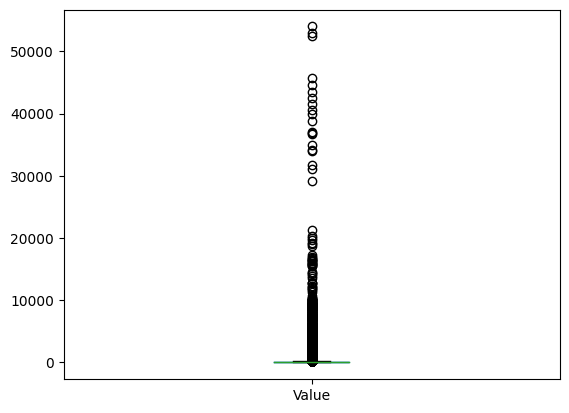

In [48]:
fig11=plot_boxplot(production, 'Value')
fig11

In [49]:
def fetch_outliers(production):
    Q1 = production.quantile(0.25)
    Q3 = production.quantile(0.75)
    IQR = Q3 - Q1

    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR

    outliers = production[((production<(Q1-1.5*IQR)) | (production>(Q3+1.5*IQR)))]

    return outliers

In [50]:
outliers = fetch_outliers(production['Value'])

print ("Max Outlier Value : "+ str(outliers.max()))
print ("Number Of Outliers : "+ str(len(outliers)))
print ("Minimum Number Of Outliers : "+ str(outliers.min()))
print(outliers)

Max Outlier Value : 54000
Number Of Outliers : 3696
Minimum Number Of Outliers : 266
0        2731
1        2415
2        2688
3        2319
4        1111
         ... 
23085     389
23086     396
23087     400
23088     410
23089     410
Name: Value, Length: 3696, dtype: int64


In [51]:
# Filter the row of the dataset with value 54000

outlierInfoProduction = production.loc[production['Value'] ==54000 ]
print(outlierInfoProduction)

       Country                  Item  Year  Value
15448  Nigeria  Cassava and products  2012  54000


In [52]:
# Sort the data starting with rows with the biggest values
producedBiggerValues = production.sort_values(by=['Value'], ascending=[False])
producedBiggerValues.head(30)

,Country,Item,Year,Value
15448,Nigeria,Cassava and products,2012,54000
15449,Nigeria,Cassava and products,2013,53000
15447,Nigeria,Cassava and products,2011,52403
15442,Nigeria,Cassava and products,2006,45721
15444,Nigeria,Cassava and products,2008,44582
15443,Nigeria,Cassava and products,2007,43410
15446,Nigeria,Cassava and products,2010,42533
15441,Nigeria,Cassava and products,2005,41565
15479,Nigeria,Yams,2013,40500
15478,Nigeria,Yams,2012,40000


In [53]:
# Histogram to show countries with most food produced between 2004 to 2013
fig12 = px.histogram(producedBiggerValues, x='Country', y='Value', title='Countries That Produced The Most Food Between 2004 To 2013')
fig12

In [54]:
# Box Plot to show countries with most food produced between 2004 to 2013

fig13 = px.box(producedBiggerValues, x='Country', y='Value', title='Countries That Produced The Most Food Between 2004 To 2013')
fig13

In [55]:
qgroupProduction=production.groupby('Country').quantile(0.25)
print(qgroupProduction)

                               Year  Value
Country                                   
Algeria                      2006.0   1.00
Angola                       2006.0   4.00
Benin                        2006.0   4.00
Botswana                     2006.0   0.00
Burkina Faso                 2006.0   7.25
Cabo Verde                   2006.0   0.00
Cameroon                     2006.0   7.00
Central African Republic     2006.0   4.25
Chad                         2006.0  17.25
Congo                        2006.0   2.00
Cote d'Ivoire                2006.0   7.00
Djibouti                     2006.0   0.00
Egypt                        2006.0  18.00
Ethiopia                     2006.0  18.00
Gabon                        2006.0   1.00
Gambia                       2006.0   1.00
Ghana                        2006.0  12.00
Guinea                       2006.0   8.00
Guinea-Bissau                2006.0   2.00
Kenya                        2006.0   4.00
Lesotho                      2006.0   1.00
Liberia    

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_11368\2609169395.py:1: FutureWarning:

Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.



In [56]:
fig14 = px.box(qgroupProduction, x='Year', y='Value')
fig14

In [57]:
prodV=production['Value']
suppV=supply['Value']

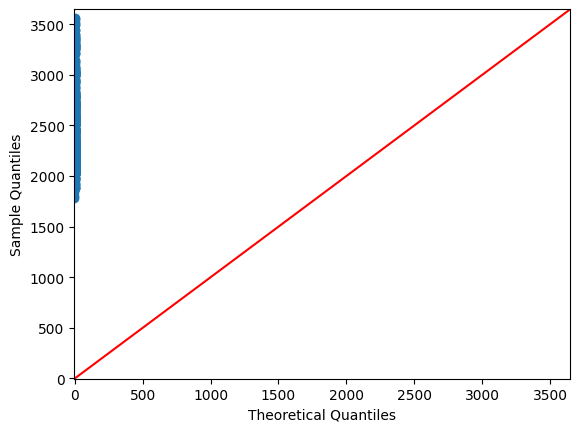

In [58]:
# Q-Q plot with 45-degree line added to supply plot
fig15 = sm.qqplot(suppV, line='45')
plt.show(fig15)

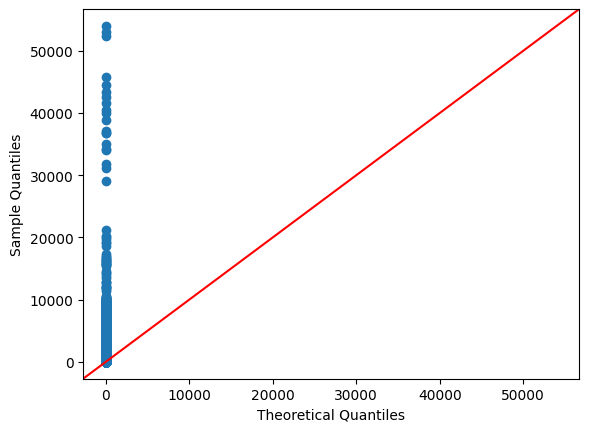

In [59]:
# Q-Q plot with 45-degree line added to production plot
fig16 = sm.qqplot(prodV, line='45')
plt.show(fig16)

In [60]:
# Perform shapiro test to test for normality
def check_normality(supply):
    test_stat_normality, p_value_normality=stats.shapiro(supply)
    print("p value:%.4f" % p_value_normality)
def check_normality(production):
    test_stat_normality, p_value_normality=stats.shapiro(production)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

In [61]:
check_normality(suppV)
check_normality(prodV)

p value:0.0000
Reject null hypothesis >> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The data is not normally distributed


c:\Users\Windows 10\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning:

p-value may not be accurate for N > 5000.



In [62]:
# Perform Kolmogorov-Smirnov test on supply and production values
ks_2samp(suppV, prodV)

KstestResult(statistic=0.9574643011683254, pvalue=0.0)

In [63]:
# Perform Kolmogorov-Smirnov test for goodness of fit for production values
kstest(prodV, 'norm')

KstestResult(statistic=0.7855146884758797, pvalue=0.0)

In [64]:
# Perform Kolmogorov-Smirnov test for goodness of fit for supply values
kstest(suppV, 'norm')
#From the output we can see that the test statistic is 1.0 and the corresponding p-value is 0.0oe. Since the p-value is less than .05, we reject the null hypothesis. We have sufficient evidence to say that the sample data does not come from a normal distribution.

KstestResult(statistic=1.0, pvalue=0.0)

In [65]:
supplyData = supply.loc[supply['Year'] <= 2006]
groupedLowsupply = supplyData.groupby(['Country']).agg(Value_sum=('Value', 'sum')).reset_index()
LowSupplyCountry = groupedLowsupply.sort_values(by=['Value_sum'], ascending=[True])
print(LowSupplyCountry)

                        Country  Value_sum
43                       Zambia       5577
13                     Ethiopia       5827
7      Central African Republic       6044
32                       Rwanda       6050
8                          Chad       6082
22                   Madagascar       6123
44                     Zimbabwe       6184
28                   Mozambique       6208
1                        Angola       6226
35                 Sierra Leone       6261
19                        Kenya       6344
21                      Liberia       6368
42  United Republic of Tanzania       6373
9                         Congo       6449
3                      Botswana       6539
23                       Malawi       6626
11                     Djibouti       6715
29                      Namibia       6741
39                         Togo       6767
18                Guinea-Bissau       6783
34                      Senegal       6795
37                        Sudan       6898
6          

In [66]:
fig17 = px.histogram(LowSupplyCountry, x='Value_sum', y='Country', title= 'Countries with highest to lowest food supply from 2004 t0 2006')
fig17

In [67]:
fig18 = px.density_heatmap(LowSupplyCountry, x='Value_sum', y='Country', title='Density Heatmap For Food Supply Between 2004 And 2006')
fig18

In [68]:
fig19 = px.violin(LowSupplyCountry, x='Country', y='Value_sum')
fig19

In [69]:
oatData = production.loc[production['Item'].str.contains('Oats')]
oatYear = oatData.loc[production['Year'] == 2010]
highOatProd = oatYear.sort_values(by=['Value'], ascending=[False])
print(highOatProd)


            Country  Item  Year  Value
46          Algeria  Oats  2010     88
6406       Ethiopia  Oats  2010     48
13186       Morocco  Oats  2010     37
17816  South Africa  Oats  2010     34
9286          Kenya  Oats  2010      3
20056       Tunisia  Oats  2010      2
22516      Zimbabwe  Oats  2010      1
7746          Ghana  Oats  2010      0
10026       Lesotho  Oats  2010      0


In [70]:
fig20 = px.bar(highOatProd, x='Country', y='Value', title='Total amount of Oats produced in 2010 and their respective countries')
fig20

In [71]:
riceData = production.loc[production['Item'].str.contains('Rice')]
groupedRice = riceData.groupby(['Country']).agg(Value_sum=('Value', 'sum')).reset_index()
highRiceProd = groupedRice.sort_values(by=['Value_sum'], ascending=[False])
print(highRiceProd)

                        Country  Value_sum
9                         Egypt      40370
26                      Nigeria      26964
18                   Madagascar      26118
35  United Republic of Tanzania      10956
14                       Guinea      10400
20                         Mali      10371
8                 Cote d'Ivoire       6439
29                 Sierra Leone       6038
28                      Senegal       2462
13                        Ghana       2443
17                      Liberia       1602
3                  Burkina Faso       1265
34                       Uganda       1234
6                          Chad       1167
24                   Mozambique       1110
15                Guinea-Bissau       1030
2                         Benin        850
4                      Cameroon        767
21                   Mauritania        751
19                       Malawi        674
33                         Togo        653
16                        Kenya        504
27         

In [72]:
fig21 = px.strip(highRiceProd, x='Country', y='Value_sum', title='Countries that produced the highest total quantity of rice from 2004 to 2013')
fig21

In [73]:
grouped= production[['Item', 'Value', 'Year']]
groupedPro = grouped.groupby(['Year', 'Item']).agg(Value_sum=('Value', 'sum')).reset_index()
groupedprod = groupedPro.sort_values(by=['Year'], ascending=[True])
groupedProduce = groupedprod.loc[groupedprod['Year'] == 2013]
HighestProductsIn2013 = groupedProduce.sort_values(by=['Value_sum'], ascending=[False])
print(HighestProductsIn2013)

     Year                     Item  Value_sum
858  2013     Cassava and products     136350
928  2013               Sugar cane      95348
886  2013       Maize and products      70741
939  2013                     Yams      60532
936  2013        Vegetables, Other      46243
..    ...                      ...        ...
875  2013           Fish, Body Oil         30
891  2013          Molluscs, Other         29
907  2013                   Pepper         23
876  2013          Fish, Liver Oil          4
848  2013  Aquatic Animals, Others          1

[94 rows x 3 columns]


In [74]:
fig22 = px.density_contour(HighestProductsIn2013, x='Item', y='Value_sum', title='Countries That Produced The Highest Number Of Produce In 2013')
fig22

In [75]:
# Two sampled T-test to compare the mean of supply values and production values
from scipy.stats import ttest_ind
supply_mean = np.mean(suppV)
production_mean = np.mean(prodV)
print("supply mean value:",supply_mean)
print("production mean value:",production_mean)
supply_std = np.std(suppV)
production_std = np.std(prodV)
print("supply std value:",supply_std)
print("production std value:",production_std)
ttest,pval = ttest_ind(suppV,prodV)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

supply mean value: 2469.7755555555555
production mean value: 327.7852012115967
supply std value: 378.71864177076276
production std value: 1607.9055541687558
p-value 1.3024576842820782e-172
we reject null hypothesis


In [76]:
# Select columns
proD = production[['Year', 'Value']]

# Group by and aggregate
totalProduce = proD.groupby(['Year']).agg(Value_sum=('Value', 'sum')).reset_index()
totalProduce

,Year,Value_sum
0,2004,663006
1,2005,691257
2,2006,718602
3,2007,705659
4,2008,736804
5,2009,746870
6,2010,786466
7,2011,812214
8,2012,841667
9,2013,872571


In [77]:
fig23 = px.line(totalProduce.sort_values(by=['Year'], ascending=[True]), x='Year', y='Value_sum', title='Food Production Trend Over 10 Year Period')
fig23

In [78]:
# Select columns
sup = supply[['Year', 'Value']]

# Group by and aggregate
totalSupp = sup.groupby(['Year']).agg(Value_sum=('Value', 'sum')).reset_index()

totalSupp

,Year,Value_sum
0,2004,107740
1,2005,108418
2,2006,109386
3,2007,110149
4,2008,110734
5,2009,111700
6,2010,112383
7,2011,113194
8,2012,113744
9,2013,113951


In [79]:
fig24 = px.scatter(totalSupp, x='Year', y='Value_sum', color='Year', trendline='ols', title='Food Consumption Trend Over 10 Year Period')
fig24

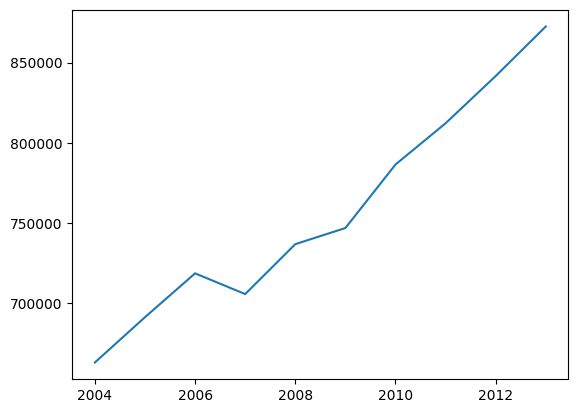

In [80]:
fig25=plt.plot(totalProduce['Year'], totalProduce['Value_sum'])
plt.show(fig25)

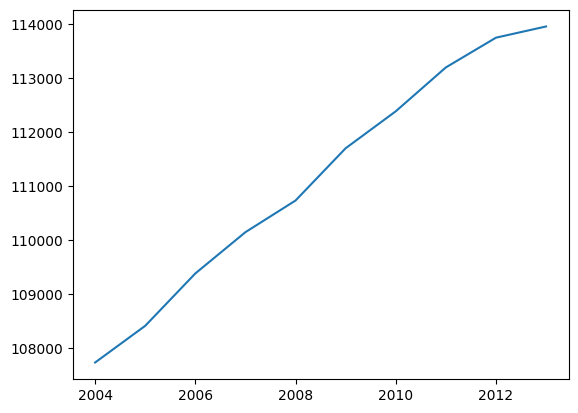

In [81]:
fig26=plt.plot(totalSupp['Year'], totalSupp['Value_sum'])
plt.show(fig26)

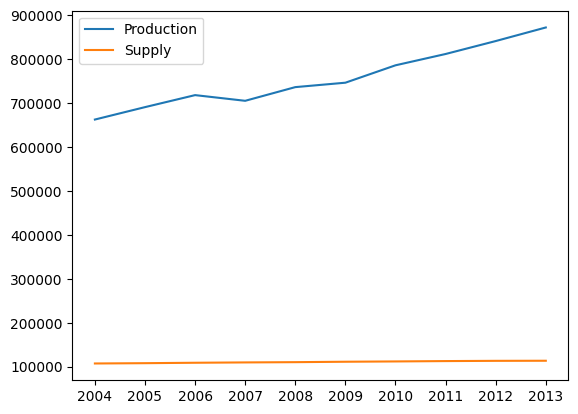

In [82]:
prodSuppYears=['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
plt.plot(prodSuppYears, totalProduce['Value_sum'], label='Production')
fig27=plt.plot(prodSuppYears, totalSupp['Value_sum'], label='Supply')
plt.legend()
plt.show(fig27)

In [83]:
popDataset = pd.read_csv (r'C:\Users\Windows 10\Desktop\Hamoye\Stage D\African Population.csv',encoding='latin-1')
popDataset.head()

,Country Name,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Angola,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,22514275.0,23356247.0,24220660.0,25107925.0,26015786.0
1,Benin,7750003.0,7982223.0,8216893.0,8454790.0,8696915.0,8944713.0,9199254.0,9460829.0,9729254.0,10004594.0
2,Burkina Faso,13030576.0,13421935.0,13829173.0,14252029.0,14689725.0,15141098.0,15605211.0,16081915.0,16571252.0,17072791.0
3,Botswana,1765533.0,1799077.0,1835911.0,1875458.0,1915636.0,1953495.0,1987106.0,2015406.0,2039551.0,2062551.0
4,Central African Republic,3959883.0,4038380.0,4118075.0,4198004.0,4273368.0,4337623.0,4386765.0,4418639.0,4436411.0,4447945.0


In [84]:
NumberOfCountry=popDataset['Country Name'].nunique()
print(NumberOfCountry)

37


In [85]:
popDataset.iloc[:, 1:].mean()

2004    1.667067e+07
2005    1.709426e+07
2006    1.753358e+07
2007    1.798845e+07
2008    1.845895e+07
2009    1.894480e+07
2010    1.944574e+07
2011    1.996176e+07
2012    2.049291e+07
2013    2.103863e+07
dtype: float64

In [86]:
DataPop={'Year':[2004,2005,2006,2007,2008,2009,2010,2011,2012,2013], 'AveragePop':[1.667067e+07, 1.709426e+07, 1.753358e+07,1.798845e+07, 1.845895e+07, 1.894480e+07, 1.944574e+07, 1.996176e+07, 2.049291e+07, 2.103863e+07]}
popData=pd.DataFrame(DataPop)
print(popData)

   Year  AveragePop
0  2004  16670670.0
1  2005  17094260.0
2  2006  17533580.0
3  2007  17988450.0
4  2008  18458950.0
5  2009  18944800.0
6  2010  19445740.0
7  2011  19961760.0
8  2012  20492910.0
9  2013  21038630.0


In [87]:
# Drop columns
prodnew = production.drop(columns=['Country', 'Item'])

# Group by and aggregate
prodGroup = prodnew.groupby(['Year']).agg(ProdValue_mean=('Value', 'mean')).reset_index()

prodGroup

,Year,ProdValue_mean
0,2004,286.767301
1,2005,298.986592
2,2006,310.814014
3,2007,305.215830
4,2008,318.686851
5,2009,323.040657
6,2010,340.166955
7,2011,351.303633
8,2012,364.831816
9,2013,378.227568


In [88]:
Leftjoin_df=pd.merge(popData, prodGroup, on='Year', how='left')
Leftjoin_df

,Year,AveragePop,ProdValue_mean
0,2004,16670670.0,286.767301
1,2005,17094260.0,298.986592
2,2006,17533580.0,310.814014
3,2007,17988450.0,305.215830
4,2008,18458950.0,318.686851
5,2009,18944800.0,323.040657
6,2010,19445740.0,340.166955
7,2011,19961760.0,351.303633
8,2012,20492910.0,364.831816
9,2013,21038630.0,378.227568


In [89]:
fig28 = px.scatter(Leftjoin_df, x='Year', y=['AveragePop', 'ProdValue_mean'])
fig28

In [90]:
fig29 = px.scatter_matrix(Leftjoin_df)
fig29

In [91]:
# Creating correlation matrix
Leftjoin_df.corr()
corrMatrix = Leftjoin_df.corr()
print (corrMatrix)

                    Year  AveragePop  ProdValue_mean
Year            1.000000    0.999208        0.979781
AveragePop      0.999208    1.000000        0.984881
ProdValue_mean  0.979781    0.984881        1.000000


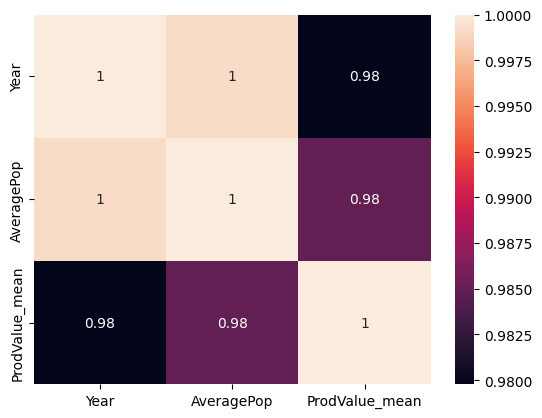

In [92]:
fig30=sn.heatmap(corrMatrix, annot=True)
plt.show(fig30)

In [93]:
AvPop=Leftjoin_df['AveragePop']
ProdVmean=Leftjoin_df['ProdValue_mean']

In [94]:
stats.ttest_1samp(a = AvPop,       # Sample data
                 popmean = ProdVmean)  # Pop mean

Ttest_1sampResult(statistic=0    40.335954
1    40.335928
2    40.335903
3    40.335915
4    40.335886
5    40.335876
6    40.335840
7    40.335816
8    40.335787
9    40.335758
Name: ProdValue_mean, dtype: float64, pvalue=0    1.761321e-11
1    1.761331e-11
2    1.761341e-11
3    1.761337e-11
4    1.761348e-11
5    1.761352e-11
6    1.761366e-11
7    1.761375e-11
8    1.761387e-11
9    1.761398e-11
Name: ProdValue_mean, dtype: float64)

In [95]:
# Drop columns
suppnew = supply.drop(columns=['Country'])

#  Group by and aggregate
suppGroup =suppnew.groupby(['Year']).agg(suppValue_mean=('Value', 'mean')).reset_index()

suppGroup

,Year,suppValue_mean
0,2004,2394.222222
1,2005,2409.288889
2,2006,2430.800000
3,2007,2447.755556
4,2008,2460.755556
5,2009,2482.222222
6,2010,2497.400000
7,2011,2515.422222
8,2012,2527.644444
9,2013,2532.244444


In [96]:
Leftjoin_supp=pd.merge(popData, suppGroup, on='Year', how='left')
Leftjoin_supp

,Year,AveragePop,suppValue_mean
0,2004,16670670.0,2394.222222
1,2005,17094260.0,2409.288889
2,2006,17533580.0,2430.800000
3,2007,17988450.0,2447.755556
4,2008,18458950.0,2460.755556
5,2009,18944800.0,2482.222222
6,2010,19445740.0,2497.400000
7,2011,19961760.0,2515.422222
8,2012,20492910.0,2527.644444
9,2013,21038630.0,2532.244444


In [97]:
AvPop1=Leftjoin_supp['AveragePop']
suppVmean=Leftjoin_supp['suppValue_mean']

In [98]:
# Calculating Pearson's coefficient
pearsons_coefficient = np.corrcoef(AvPop1, suppVmean)
print("The pearson's coeffient of the average population and the mean of supply values inputs are: \n" ,pearsons_coefficient)


The pearson's coeffient of the average population and the mean of supply values inputs are: 
 [[1.        0.9918542]
 [0.9918542 1.       ]]
